In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import time
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload

# np.set_printoptions(suppress=True,precision=5)

In [2]:
#Importing itineraries

if os.path.isfile('Data/Generated_Data/itineraries_selected.pkl'):
    
    itineraries=pd.read_pickle('Data/Generated_Data/itineraries_selected.pkl')

elif os.path.isfile('Data/Generated_Data/itineraries.pkl'):
    
    itineraries=pd.read_pickle('Data/Generated_Data/itineraries.pkl')
    itineraries=src.itineraries.DriverTrips(itineraries)
    itineraries=src.itineraries.SelectCommuters(itineraries)
    itineraries=src.itineraries.SelectMUD(itineraries)
    
    pkl.dump(itineraries,open('Data/Generated_Data/itineraries_selected.pkl','wb'))

In [213]:
deep_reload(src)

# n=np.random.randint(0,len(itineraries)-1)
# n=146781
# n=12453
# n=142611
# n=26109
# n=4083
n=679
print(n)

solver_kwargs={'_name':'cbc','executable':'src/cbc'}
# solver_kwargs={'_name':'HiGHS','executable':'src/highs'}

# itinerary_kwargs={'ad_hoc_charger_power':0,'destination_charger_power':12e3}
# itinerary_kwargs={'travel_penalty':1e10,'payment_penalty':-1e5}
itinerary_kwargs={
    'initial_soc':.5,
    'home_charger_likelihood':0,
    'work_charger_likelihood':0,
    'destination_charger_likelihood':.5,
}

# itinerary_kwargs={}
problem=src.optimization.PHEVCSP(itineraries[n],itinerary_kwargs=itinerary_kwargs)
problem.Solve(solver_kwargs)
print(f'solver status: {problem.solver_status}, '+
      f'solver termination condition: {problem.solver_termination_condition}')
print(f'sic: {problem.sic}')

679
solver status: ok, solver termination condition: optimal
sic: 0.0314519403167659


[None]

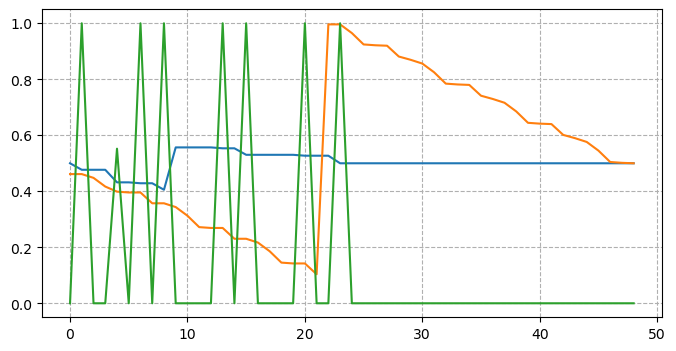

In [215]:
deep_reload(src)

line_kwargs={
    'linewidth':3,
}

axes_kwargs={
    'facecolor':'whitesmoke',
    'ylim':[0,1],
    'xlabel':'Trip/Park Event',
    'ylabel':'SOC [-]',
}

fig,ax=plt.subplots(1,1,figsize=(8,4))
if not hasattr(ax,'__iter__'):
    ax=[ax]
    
ax[0].plot(problem.solution.soc)
ax[0].plot(problem.solution.sof)
ax[0].plot(problem.solution.u_cd_cs[0])

# src.figures.PlotSOCTrace(problem_s,ax=ax[0],colors=src.figures.color_scheme_3_0,
#                         line_kwargs=line_kwargs,axes_kwargs=axes_kwargs)

# src.figures.PlotSOCTrace(problem_d,ax=ax[1],colors=src.figures.color_scheme_3_0,
#                         line_kwargs=line_kwargs,axes_kwargs=axes_kwargs)

_=[ax.grid(ls='--') for ax in ax]

In [199]:
problem.solution

,u_dd,u_db,u_ad,u_ab,u_cd_cs,soc,sof
,0,0,0,0,0,0,0
0,0.0,0.0,0.000000,0.0,0.0,0.5,0.494143
1,0.0,0.0,0.000000,0.0,0.0,0.5,0.487992
2,0.0,0.0,0.000000,0.0,0.0,0.5,0.447033
3,0.0,0.0,0.000000,0.0,0.0,0.5,0.404636
4,0.0,0.0,0.000000,0.0,0.0,0.5,0.398779
5,0.0,0.0,0.000000,0.0,0.0,0.5,0.392628
6,0.0,0.0,0.000000,0.0,0.0,0.5,0.351669
7,0.0,0.0,0.000000,0.0,0.0,0.5,0.309272
8,0.0,0.0,0.000000,0.0,0.0,0.5,0.303416


In [90]:
deep_reload(src)

n=np.random.randint(0,len(itineraries)-1)
# n=146781
# n=12453
# n=142611
# n=26109
# n=4083
print(n)

solver_kwargs={'_name':'cbc','executable':'src/cbc'}
# solver_kwargs={'_name':'HiGHS','executable':'src/highs'}

itinerary_kwargs={'ad_hoc_charger_power':0}
itinerary_kwargs={}
problem=src.optimization.EVCSP(itineraries[n],itinerary_kwargs=itinerary_kwargs)
problem.Solve(solver_kwargs)

81
ERROR: Solver (asl) returned non-zero return code (127)
ERROR: Solver log: /home/aaron/Desktop/VOIC/src/highs: error while loading
shared libraries: libhighs.so.1.6: cannot open shared object file: No such
file or directory


ApplicationError: Solver (asl) did not exit normally

0.0

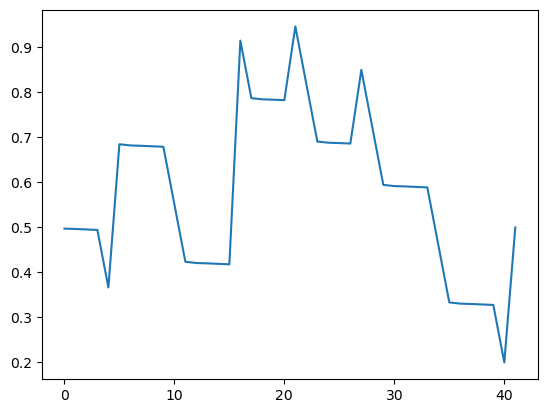

In [5]:
plt.plot(problem.solution.soc[0])
problem.sic

In [6]:
deep_reload(src)

n=np.random.randint(0,len(itineraries)-1)
# n=146781
# n=12453
# n=142611
# n=26109
n=4083
print(n)

solver_kwargs={'_name':'cbc','executable':'src/cbc'}

itinerary_kwargs={'ad_hoc_charger_power':0}
itinerary_kwargs={'instances':5,
                  'home_charger_likelihood':0,
                  'work_charger_likelihoood':0,
                  'destination_charger_likelihood':.1}
problem=src.optimization.SEVCSP(itineraries[n],itinerary_kwargs=itinerary_kwargs)
problem.Solve(solver_kwargs)

4083


In [7]:
problem.sic

array([0.07585106, 0.07510978, 0.05998087, 0.07510978, 0.07510978])

In [8]:
deep_reload(src)

separated_inputs_list=src.optimization.SeparateInputs(problem.inputs)

In [9]:
sic=0
for idx in range(len(separated_inputs_list)):
    problem=src.optimization.EVCSP(inputs=separated_inputs_list[idx])
    problem.Solve(solver_kwargs)
    sic+=problem.sic
sic/len(separated_inputs_list)

0.03580598699924601

In [76]:
deep_reload(src)

n=np.random.randint(0,len(itineraries)-1)
# n=4083
print(n)

solver_kwargs={'_name':'cbc','executable':'src/cbc'}

itinerary_kwargs={'instances':5,
                  'home_charger_likelihood':.1,
                  'work_charger_likelihood':0,
                  'destination_charger_likelihood':.1}

t0=time.time()
sic_s,problem_s=src.optimization.RunStochastic(itineraries[13],
                                              itinerary_kwargs=itinerary_kwargs,
                                              solver_kwargs=solver_kwargs)
t1=time.time()
sic_d,problem_d=src.optimization.RunAsIndividuals(problem_s,
                                                solver_kwargs=solver_kwargs)
t2=time.time()

print(t2-t1,t1-t0)
print(sic_d.mean(),sic_s.mean())

220
0.36445164680480957 0.35059428215026855
0.015277044821339222 0.05258769951603485


[None, None]

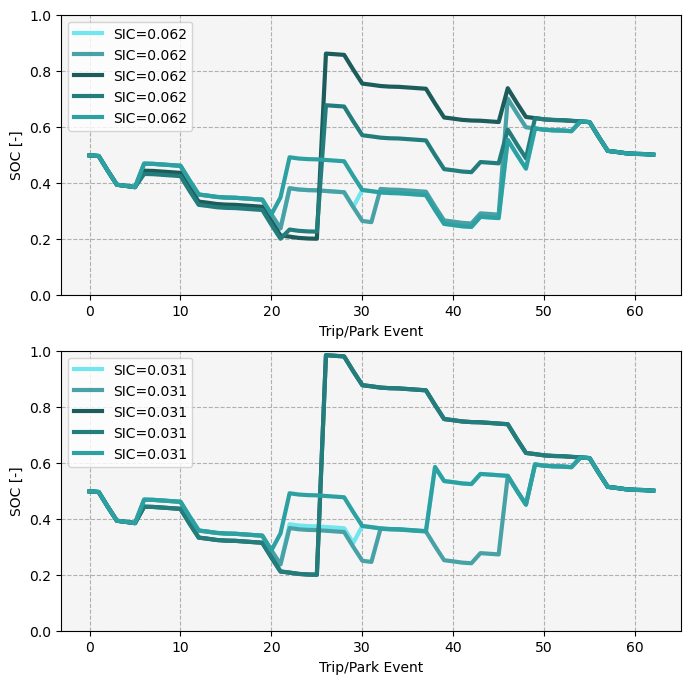

In [77]:
deep_reload(src)

line_kwargs={
    'linewidth':3,
}

axes_kwargs={
    'facecolor':'whitesmoke',
    'ylim':[0,1],
    'xlabel':'Trip/Park Event',
    'ylabel':'SOC [-]',
}

fig,ax=plt.subplots(2,1,figsize=(8,8))

src.figures.PlotSOCTrace(problem_s,ax=ax[0],colors=src.figures.color_scheme_3_0,
                        line_kwargs=line_kwargs,axes_kwargs=axes_kwargs)

src.figures.PlotSOCTrace(problem_d,ax=ax[1],colors=src.figures.color_scheme_3_0,
                        line_kwargs=line_kwargs,axes_kwargs=axes_kwargs)

[ax.grid(ls='--') for ax in ax]